***

<b> <center>
    Machine Learning <br>
    A1: Regression-Based Analysis
</b>
    
   <center> Jaisanker Venugopalan Nair </center>
  <center>  FMSBA3 (Castro)</center>
    <center>DAT5303 - Machine Learning</center>
<center>Professor Chase Kusterer</center>
<center>Hult International Business School</center>

 
    
***

<u>Course Case: Apprentice Chef : </u>

<br>
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award-winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app(Taken from the case study of Machine Learning Assignment-1).</br>
<br>

<u>Case Challenge Part I (Individual Assignment 1) : </u>

After three years serving customers across the San Francisco Bay Area, the executives at
Apprentice Chef have come to realize that over 90% of their revenue comes from customers
that have been ordering meal sets for 12 months or less. Given this information, they would like
to better understand how much revenue to expect from each customer within their first year of
orders.</br>

<u>Objective:</u>
<br>A. Analyze the data provided </br>
<br>B. Build a machine learning model to predict revenue over the first year of each customer’s life cycle </br>
<br>C. Develop your insights</br>

<h3>A. Analyze the data provided</h3>
<br>Steps involved to do the Data analysis will be as below :</br>
<br>(i) import and prepare data for analysis</br>
<br>(ii) set thresholds for outliers</br>
<br>(iii) create flag columns for outliers</br>
<br>(iv) set thresholds for trends</br>
<br>(v) create flag columns for trends</br>
<br>(vi) feature engineering by creating new columns</br>
<br>(vii) analyze the findings</br>

In [46]:
#importing required packages

import pandas                  as pd                             # data science essentials
import matplotlib.pyplot       as plt                            # essential graphical output
import seaborn                 as sns                            # enhanced graphical output
import numpy                   as np                             # fundamental package in python
import statsmodels.formula.api as smf                            # regression modeling
import random                  as rand                           # random numbers
import gender_guesser.detector as gender                         # import gender guesser
import sklearn.linear_model                                      # linear regression model
                    
from   sklearn.model_selection import train_test_split           # train/test split
from   sklearn.linear_model    import LinearRegression           # linear regression (scikit-learn)
from   sklearn.preprocessing   import StandardScaler             # standard scaler
from   sklearn.ensemble        import GradientBoostingRegressor  # gradient boosting regression
from   sklearn.metrics         import mean_squared_error         # mean sqaure error
from   sklearn.utils           import shuffle                    # shuffle
from   sklearn                 import ensemble, datasets         # ensembles and datasets

# setting pandas print options
pd.set_option('display.max_rows',    500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',      1000)

# read the file
file        = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

Performing the basic function calls to understand the data provided

In [47]:
original_df.info()
original_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


Basic Data imputing steps to be performed as there are 47 missing values in the "FAMILY_NAME" column. While it is unclear whether this might add value to the analysis, it does not take up much time or resource to perform the step

In [48]:
# Flagging the missing values by creating a new column (missing_columnname) using a for loop
for col in original_df:
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['MISSING_'+col] = original_df[col].isnull().astype(int)

# creating an imputation value and imputing 'FAMILY_NAME'
fill = 'Unavailable'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

#dropping the column used to create flags for missing family name
# original_df = original_df.drop(labels = 'MISSING_FAMILY_NAME', axis = 1)


Correlations to be found out

In [49]:
# original_df_corr = original_df.corr().round(2)
# print(original_df_corr.loc['REVENUE'].sort_values(ascending = False))

Prepping the data for stats models

In [50]:
X_variables = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
              'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
              'TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN',
              'EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
              'FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
              'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED']
y_variables = ['REVENUE']



In [51]:
# #for loop to create threshold variables for each variable

# for val in X_variables:
#     print(f"+ original_df['{val}']")

In [72]:
lm_full = smf.ols(formula = """original_df['REVENUE'] ~ + original_df['TOTAL_MEALS_ORDERED']
+ original_df['UNIQUE_MEALS_PURCH']
+ original_df['CONTACTS_W_CUSTOMER_SERVICE']
+ original_df['PRODUCT_CATEGORIES_VIEWED']
+ original_df['AVG_TIME_PER_SITE_VISIT']
+ original_df['MOBILE_NUMBER']
+ original_df['CANCELLATIONS_BEFORE_NOON']
+ original_df['CANCELLATIONS_AFTER_NOON']
+ original_df['TASTES_AND_PREFERENCES']
+ original_df['PC_LOGINS']
+ original_df['MOBILE_LOGINS']
+ original_df['WEEKLY_PLAN']
+ original_df['EARLY_DELIVERIES']
+ original_df['LATE_DELIVERIES']
+ original_df['PACKAGE_LOCKER']
+ original_df['REFRIGERATED_LOCKER']
+ original_df['FOLLOWED_RECOMMENDATIONS_PCT']
+ original_df['AVG_PREP_VID_TIME']
+ original_df['LARGEST_ORDER_SIZE']
+ original_df['MASTER_CLASSES_ATTENDED']
+ original_df['MEDIAN_MEAL_RATING']
+ original_df['AVG_CLICKS_PER_VISIT']
+ original_df['TOTAL_PHOTOS_VIEWED']

                            """,
                               data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
print(results_full.summary())

                              OLS Regression Results                              
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.640
Model:                                OLS   Adj. R-squared:                  0.636
Method:                     Least Squares   F-statistic:                     148.6
Date:                    Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                            18:47:32   Log-Likelihood:                -15461.
No. Observations:                    1946   AIC:                         3.097e+04
Df Residuals:                        1922   BIC:                         3.110e+04
Df Model:                              23                                         
Covariance Type:                nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

Base Model for Training and testing

In [53]:
original_df_data   = original_df.loc[ : , X_variables]

original_df_target = original_df.loc[:, y_variables]
# train-test split
X_train, X_test, y_train, y_test = train_test_split(original_df_data,original_df_target ,
                                                   test_size = 0.25, 
                                                   random_state = 222 )
lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score :',  lr.score(X_test, y_test).round(4))
lr_train_score_0 = lr.score(X_train, y_train).round(4)
lr_test_score_0  = lr.score(X_test, y_test).round(4)

Function definitions to create Histograms, boxplots and scatterplots.
<br> It is always good practice to define functions for operations that are repetitive and with chances of high usage. </br>

In [54]:
#Creating a dataframe without the variables of object type
original_df_sub = original_df.drop(['NAME','EMAIL','FIRST_NAME','FAMILY_NAME',],
        axis = 1)

# Function definition for Histogram
def hist(var,data):
    """ 
    Function to create histograms for variables
    
    PARAMETERS
	----------
	var : str, response variable
	data     : DataFrame of the categorical variables
	"""
    sns.distplot(data[var],
                 bins  = 'fd',
                 color = 'b')
    plt.xlabel(var)
    plt.show()

# Function definition for Boxplot
def box(response, cat_var, data):
    """
	Function to create bocplots for each categorical variable

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    original_df_sub.boxplot(column 		 = response,
                            by           = cat_var,
                            vert         = False,
                            patch_artist = False,
                            meanline     = True,
                            showmeans    = True)
    plt.show()
    
# Function definition for scatter
def scatter(var,data):
    """ 
    Function to create scatter plot for variables
    
    PARAMETERS
	----------
	var      : str, response variable
	data     : DataFrame of the categorical variables
	"""
    sns.scatterplot(x     = original_df_sub[var],
                    y     = original_df_sub['REVENUE'],
                    color = 'b')
    plt.xlabel(var)
    plt.show()
    

For loops to create histograms and boxplots to identify the patterns and outliers. While the output is not of high presentation quality, it serves the purpose of analyzing the patterns by the analyst. The for loops should be improved if the intention is to present to a second party

In [55]:
# #For Loop for Histograms
# for col in original_df_sub.columns:
#     hist(var  = col,
#          data     = original_df_sub)

In [56]:
# #For Loop for boxplots
# for col in original_df_sub.columns:
#     box(response = 'REVENUE',
#         cat_var  = col,
#         data     = original_df_sub)

In [57]:
# #For Loop for scatterplots
# for col in original_df_sub.columns:
#     scatter(var  = col,
#             data = original_df_sub)

In [58]:
# #for loop to create threshold variables for each variable
# for val in X_variables:
#     print(f"{val}_LO = \n{val}_HI = ")

<u>Setting Outlier Thresholds</u>
<br> A for loop is used to easily print out the format of the hi and low outliers. The main purpose is to reduce effort and standardize the naming conventions followed in this assignment.</br>
<br> A lowr cutoff point of 0.25 and an upper cutoff point of 0.75 is set as default and will be changed after analyzing the distplot ouputs </br>

In [59]:
# #for loops to create threshold variables for each variable and replace the values in newly created TH columns
    
# for val in X_variables:
#     print(f"{val}_LO = original_df['{val}'].quantile(0.25)")
#     print(f"{val}_HI = original_df['{val}'].quantile(0.78)\n")


In [73]:
# outlier flags - LO stands for lower thresholds and *****_HI stands for Upper limits that we want to set falgs for
TOTAL_MEALS_ORDERED_LO = 10
TOTAL_MEALS_ORDERED_HI = 400

UNIQUE_MEALS_PURCH_LO = 2
UNIQUE_MEALS_PURCH_HI = 9

CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 10

PRODUCT_CATEGORIES_VIEWED_LO = 1
PRODUCT_CATEGORIES_VIEWED_HI = 10

AVG_TIME_PER_SITE_VISIT_LO = 0
AVG_TIME_PER_SITE_VISIT_HI = 250

MOBILE_NUMBER_LO = 0 
MOBILE_NUMBER_HI = 1

CANCELLATIONS_BEFORE_NOON_LO = 0
CANCELLATIONS_BEFORE_NOON_HI = 9

CANCELLATIONS_AFTER_NOON_LO = 0
CANCELLATIONS_AFTER_NOON_HI = 3

TASTES_AND_PREFERENCES_LO = 0
TASTES_AND_PREFERENCES_HI = 1

PC_LOGINS_LO = 4.5
PC_LOGINS_HI = 6.5

MOBILE_LOGINS_LO = 0.5
MOBILE_LOGINS_HI = 2.5

WEEKLY_PLAN_LO = 0
WEEKLY_PLAN_HI = 20

EARLY_DELIVERIES_LO = 0
EARLY_DELIVERIES_HI = 5

LATE_DELIVERIES_LO = 0
LATE_DELIVERIES_HI = 10

PACKAGE_LOCKER_LO = 0
PACKAGE_LOCKER_HI = 1

REFRIGERATED_LOCKER_LO = 0
REFRIGERATED_LOCKER_HI = 1

FOLLOWED_RECOMMENDATIONS_PCT_LO = 10
FOLLOWED_RECOMMENDATIONS_PCT_HI = 35

AVG_PREP_VID_TIME_LO = 0 #60
AVG_PREP_VID_TIME_HI = 300

LARGEST_ORDER_SIZE_LO = 2
LARGEST_ORDER_SIZE_HI = 8 #6

MASTER_CLASSES_ATTENDED_LO = 0
MASTER_CLASSES_ATTENDED_HI = 6 #2

MEDIAN_MEAL_RATING_LO = 4.5
MEDIAN_MEAL_RATING_HI = original_df['MEDIAN_MEAL_RATING'].quantile(0.8)

AVG_CLICKS_PER_VISIT_LO = 7.5
AVG_CLICKS_PER_VISIT_HI = 17.5

TOTAL_PHOTOS_VIEWED_LO = 0
TOTAL_PHOTOS_VIEWED_HI = 450

<br>For loop to print the basic format to create new flag columns and set values. This can be changed based on the need and helps in standardizing the code segments.</br>

In [61]:
# for val in X_variables:
#     print(f"original_df['TH_{val}'] = 0")
#     print(f"c_hi = original_df.loc[0:,'TH_{val}'][original_df['{val}'] > {val}_HI]")
#     print(f"c_lo = original_df.loc[0:,'TH_{val}'][original_df['{val}'] < {val}_LO]")

#     print(f"original_df['TH_{val}'].replace(to_replace = c_hi,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)")

#     print(f"original_df['TH_{val}'].replace(to_replace = c_lo,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)\n")

After analyzing the distplots, the lower and upper limits can be set in an effort achieve the most normal distribution as possible

In [74]:
original_df['TH_TOTAL_MEALS_ORDERED'] = 0
c_hi = original_df.loc[0:,'TH_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]
c_lo = original_df.loc[0:,'TH_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_LO]
original_df['TH_TOTAL_MEALS_ORDERED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TOTAL_MEALS_ORDERED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_UNIQUE_MEALS_PURCH'] = 0
c_hi = original_df.loc[0:,'TH_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]
c_lo = original_df.loc[0:,'TH_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_LO]
original_df['TH_UNIQUE_MEALS_PURCH'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_UNIQUE_MEALS_PURCH'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'] = 0
c_hi = original_df.loc[0:,'TH_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
c_lo = original_df.loc[0:,'TH_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]
original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PRODUCT_CATEGORIES_VIEWED'] = 0
c_hi = original_df.loc[0:,'TH_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
c_lo = original_df.loc[0:,'TH_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]
original_df['TH_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_TIME_PER_SITE_VISIT'] = 0
c_hi = original_df.loc[0:,'TH_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]
c_lo = original_df.loc[0:,'TH_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_LO]
original_df['TH_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MOBILE_NUMBER'] = 0
c_hi = original_df.loc[0:,'TH_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] >= MOBILE_NUMBER_HI]
c_lo = original_df.loc[0:,'TH_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] <= MOBILE_NUMBER_LO]
original_df['TH_MOBILE_NUMBER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MOBILE_NUMBER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CANCELLATIONS_BEFORE_NOON'] = 0
c_hi = original_df.loc[0:,'TH_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]
c_lo = original_df.loc[0:,'TH_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_LO]
original_df['TH_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CANCELLATIONS_AFTER_NOON'] = 0
c_hi = original_df.loc[0:,'TH_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]
c_lo = original_df.loc[0:,'TH_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_LO]
original_df['TH_CANCELLATIONS_AFTER_NOON'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CANCELLATIONS_AFTER_NOON'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_TASTES_AND_PREFERENCES'] = 0
c_hi = original_df.loc[0:,'TH_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] > TASTES_AND_PREFERENCES_HI]
c_lo = original_df.loc[0:,'TH_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] < TASTES_AND_PREFERENCES_LO]
original_df['TH_TASTES_AND_PREFERENCES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TASTES_AND_PREFERENCES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PC_LOGINS'] = 0
c_hi = original_df.loc[0:,'TH_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_HI]
c_lo = original_df.loc[0:,'TH_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_LO]
original_df['TH_PC_LOGINS'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PC_LOGINS'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MOBILE_LOGINS'] = 0
c_hi = original_df.loc[0:,'TH_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
c_lo = original_df.loc[0:,'TH_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]
original_df['TH_MOBILE_LOGINS'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MOBILE_LOGINS'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_WEEKLY_PLAN'] = 0
c_hi = original_df.loc[0:,'TH_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]
c_lo = original_df.loc[0:,'TH_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] < WEEKLY_PLAN_LO]
original_df['TH_WEEKLY_PLAN'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_WEEKLY_PLAN'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_EARLY_DELIVERIES'] = 0
c_hi = original_df.loc[0:,'TH_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]
c_lo = original_df.loc[0:,'TH_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_LO]
original_df['TH_EARLY_DELIVERIES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_EARLY_DELIVERIES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_LATE_DELIVERIES'] = 0
c_hi = original_df.loc[0:,'TH_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]
c_lo = original_df.loc[0:,'TH_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] < LATE_DELIVERIES_LO]
original_df['TH_LATE_DELIVERIES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_LATE_DELIVERIES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PACKAGE_LOCKER'] = 0
c_hi = original_df.loc[0:,'TH_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] >= PACKAGE_LOCKER_HI]
c_lo = original_df.loc[0:,'TH_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] <= PACKAGE_LOCKER_LO]
original_df['TH_PACKAGE_LOCKER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PACKAGE_LOCKER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_REFRIGERATED_LOCKER'] = 0
c_hi = original_df.loc[0:,'TH_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] >= REFRIGERATED_LOCKER_HI]
c_lo = original_df.loc[0:,'TH_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] <= REFRIGERATED_LOCKER_LO]
original_df['TH_REFRIGERATED_LOCKER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_REFRIGERATED_LOCKER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
c_hi = original_df.loc[0:,'TH_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]
c_lo = original_df.loc[0:,'TH_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_RECOMMENDATIONS_PCT_LO]
original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_PREP_VID_TIME'] = 0
c_hi = original_df.loc[0:,'TH_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]
c_lo = original_df.loc[0:,'TH_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_LO]
original_df['TH_AVG_PREP_VID_TIME'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_PREP_VID_TIME'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_LARGEST_ORDER_SIZE'] = 0
c_hi = original_df.loc[0:,'TH_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]
c_lo = original_df.loc[0:,'TH_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_LO]
original_df['TH_LARGEST_ORDER_SIZE'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_LARGEST_ORDER_SIZE'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MASTER_CLASSES_ATTENDED'] = 0
c_hi = original_df.loc[0:,'TH_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]
c_lo = original_df.loc[0:,'TH_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_LO]
original_df['TH_MASTER_CLASSES_ATTENDED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MASTER_CLASSES_ATTENDED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MEDIAN_MEAL_RATING'] = 0
c_hi = original_df.loc[0:,'TH_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]
c_lo = original_df.loc[0:,'TH_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_LO]
original_df['TH_MEDIAN_MEAL_RATING'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MEDIAN_MEAL_RATING'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_CLICKS_PER_VISIT'] = 0
c_hi = original_df.loc[0:,'TH_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
c_lo = original_df.loc[0:,'TH_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]
original_df['TH_AVG_CLICKS_PER_VISIT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_CLICKS_PER_VISIT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_TOTAL_PHOTOS_VIEWED'] = 0
c_hi = original_df.loc[0:,'TH_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]
c_lo = original_df.loc[0:,'TH_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_LO]
original_df['TH_TOTAL_PHOTOS_VIEWED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TOTAL_PHOTOS_VIEWED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

<u>Setting Trend Thresholds</u>
<br> A for loop is used to easily print out the format of the hi and low trend markers. The main purpose is to reduce effort and standardize the naming conventions followed in this assignment.</br>
<br> A lowr cutoff point of 0.25 and an upper cutoff point of 0.75 is set as default markers and will be changed after analyzing the scatterplot ouputs </br>

In [75]:
# #for loops to create threshold variables for each variable and replace the values in newly created TH columns
    
# for val in X_variables:
#     print(f"{val}_CHG_LO = original_df['{val}'].quantile(0.25)")
#     print(f"{val}_CHG_HI = original_df['{val}'].quantile(0.75)\n")

<br>For loop to print the basic format to create new flag columns and set values. This can be changed based on the need and helps in standardizing the code segments.</br>

In [76]:
TOTAL_MEALS_ORDERED_CHG_LO = 50
TOTAL_MEALS_ORDERED_CHG_HI = 350

UNIQUE_MEALS_PURCH_CHG_LO = 1
UNIQUE_MEALS_PURCH_CHG_HI = 10

CONTACTS_W_CUSTOMER_SERVICE_CHG_LO = 0
CONTACTS_W_CUSTOMER_SERVICE_CHG_HI = 10

PRODUCT_CATEGORIES_VIEWED_CHG_LO = 0
PRODUCT_CATEGORIES_VIEWED_CHG_HI = 10

AVG_TIME_PER_SITE_VISIT_CHG_LO = 0
AVG_TIME_PER_SITE_VISIT_CHG_HI = 300 

MOBILE_NUMBER_CHG_LO = 0
MOBILE_NUMBER_CHG_HI = 1

CANCELLATIONS_BEFORE_NOON_CHG_LO = 2
CANCELLATIONS_BEFORE_NOON_CHG_HI = 8

CANCELLATIONS_AFTER_NOON_CHG_LO = original_df['CANCELLATIONS_AFTER_NOON'].quantile(0.2)
CANCELLATIONS_AFTER_NOON_CHG_HI = original_df['CANCELLATIONS_AFTER_NOON'].quantile(0.8)

TASTES_AND_PREFERENCES_CHG_LO = original_df['TASTES_AND_PREFERENCES'].quantile(0.2)
TASTES_AND_PREFERENCES_CHG_HI = original_df['TASTES_AND_PREFERENCES'].quantile(0.8)

PC_LOGINS_CHG_LO = original_df['PC_LOGINS'].quantile(0.2)
PC_LOGINS_CHG_HI = original_df['PC_LOGINS'].quantile(0.8)

MOBILE_LOGINS_CHG_LO = original_df['MOBILE_LOGINS'].quantile(0.25)
MOBILE_LOGINS_CHG_HI = original_df['MOBILE_LOGINS'].quantile(0.75)

WEEKLY_PLAN_CHG_LO = 0
WEEKLY_PLAN_CHG_HI = 50 #40

EARLY_DELIVERIES_CHG_LO = 0
EARLY_DELIVERIES_CHG_HI = 6

LATE_DELIVERIES_CHG_LO = 0
LATE_DELIVERIES_CHG_HI = 7.5

PACKAGE_LOCKER_CHG_LO = 0
PACKAGE_LOCKER_CHG_HI = 1

REFRIGERATED_LOCKER_CHG_LO = original_df['REFRIGERATED_LOCKER'].quantile(0.25)
REFRIGERATED_LOCKER_CHG_HI = original_df['REFRIGERATED_LOCKER'].quantile(0.75)

FOLLOWED_RECOMMENDATIONS_PCT_CHG_LO = 0
FOLLOWED_RECOMMENDATIONS_PCT_CHG_HI = 60 #40 55 - 70

AVG_PREP_VID_TIME_CHG_LO = 50 #0
AVG_PREP_VID_TIME_CHG_HI = 200

LARGEST_ORDER_SIZE_CHG_LO = 0
LARGEST_ORDER_SIZE_CHG_HI = 10

MASTER_CLASSES_ATTENDED_CHG_LO = original_df['MASTER_CLASSES_ATTENDED'].quantile(0.25)
MASTER_CLASSES_ATTENDED_CHG_HI = original_df['MASTER_CLASSES_ATTENDED'].quantile(0.75)

MEDIAN_MEAL_RATING_CHG_LO = 0
MEDIAN_MEAL_RATING_CHG_HI = 4

AVG_CLICKS_PER_VISIT_CHG_LO = 6 #6
AVG_CLICKS_PER_VISIT_CHG_HI = 18

TOTAL_PHOTOS_VIEWED_CHG_LO = 0
TOTAL_PHOTOS_VIEWED_CHG_HI = 1000 #200

<br>For loop to print the basic format to create new flag columns and set values. This can be changed based on the need and helps in standardizing the code segments.</br>

In [77]:
# for val in X_variables:
#     print(f"original_df['CHG_{val}'] = 0")
#     print(f"ch_hi = original_df.loc[0:,'CHG_{val}'][original_df['{val}'] > {val}_CHG_HI]")
#     print(f"ch_lo = original_df.loc[0:,'CHG_{val}'][original_df['{val}'] < {val}_CHG_LO]")

#     print(f"original_df['CHG_{val}'].replace(to_replace = ch_hi,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)")

#     print(f"original_df['CHG_{val}'].replace(to_replace = ch_lo,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)\n")

After analyzing the scatterplot, the lower and upper limits can be set in an effort to cover most data points as possible while accounting for outliers

In [78]:
original_df['CHG_TOTAL_MEALS_ORDERED'] = 0
ch_hi = original_df.loc[0:,'CHG_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_CHG_LO]
original_df['CHG_TOTAL_MEALS_ORDERED'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_TOTAL_MEALS_ORDERED'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_UNIQUE_MEALS_PURCH'] = 0
ch_hi = original_df.loc[0:,'CHG_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_CHG_LO]
original_df['CHG_UNIQUE_MEALS_PURCH'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_UNIQUE_MEALS_PURCH'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_CONTACTS_W_CUSTOMER_SERVICE'] = 0
ch_hi = original_df.loc[0:,'CHG_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_CHG_LO]
original_df['CHG_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_PRODUCT_CATEGORIES_VIEWED'] = 0
ch_hi = original_df.loc[0:,'CHG_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_CHG_LO]
original_df['CHG_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_AVG_TIME_PER_SITE_VISIT'] = 0
ch_hi = original_df.loc[0:,'CHG_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_CHG_LO]
original_df['CHG_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_MOBILE_NUMBER'] = 0
ch_hi = original_df.loc[0:,'CHG_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] > MOBILE_NUMBER_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] < MOBILE_NUMBER_CHG_LO]
original_df['CHG_MOBILE_NUMBER'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_MOBILE_NUMBER'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_CANCELLATIONS_BEFORE_NOON'] = 0
ch_hi = original_df.loc[0:,'CHG_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_CHG_LO]
original_df['CHG_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_CANCELLATIONS_AFTER_NOON'] = 0
ch_hi = original_df.loc[0:,'CHG_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_CHG_LO]
original_df['CHG_CANCELLATIONS_AFTER_NOON'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_CANCELLATIONS_AFTER_NOON'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_TASTES_AND_PREFERENCES'] = 0
ch_hi = original_df.loc[0:,'CHG_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] > TASTES_AND_PREFERENCES_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] < TASTES_AND_PREFERENCES_CHG_LO]
original_df['CHG_TASTES_AND_PREFERENCES'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_TASTES_AND_PREFERENCES'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_PC_LOGINS'] = 0
ch_hi = original_df.loc[0:,'CHG_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_CHG_LO]
original_df['CHG_PC_LOGINS'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_PC_LOGINS'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_MOBILE_LOGINS'] = 0
ch_hi = original_df.loc[0:,'CHG_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_CHG_LO]
original_df['CHG_MOBILE_LOGINS'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_MOBILE_LOGINS'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_WEEKLY_PLAN'] = 0
ch_hi = original_df.loc[0:,'CHG_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] < WEEKLY_PLAN_CHG_LO]
original_df['CHG_WEEKLY_PLAN'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_WEEKLY_PLAN'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_EARLY_DELIVERIES'] = 0
ch_hi = original_df.loc[0:,'CHG_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_CHG_LO]
original_df['CHG_EARLY_DELIVERIES'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_EARLY_DELIVERIES'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_LATE_DELIVERIES'] = 0
ch_hi = original_df.loc[0:,'CHG_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] < LATE_DELIVERIES_CHG_LO]
original_df['CHG_LATE_DELIVERIES'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_LATE_DELIVERIES'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_PACKAGE_LOCKER'] = 0
ch_hi = original_df.loc[0:,'CHG_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] > PACKAGE_LOCKER_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] < PACKAGE_LOCKER_CHG_LO]
original_df['CHG_PACKAGE_LOCKER'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_PACKAGE_LOCKER'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_REFRIGERATED_LOCKER'] = 0
ch_hi = original_df.loc[0:,'CHG_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] > REFRIGERATED_LOCKER_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] < REFRIGERATED_LOCKER_CHG_LO]
original_df['CHG_REFRIGERATED_LOCKER'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_REFRIGERATED_LOCKER'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
ch_hi = original_df.loc[0:,'CHG_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_RECOMMENDATIONS_PCT_CHG_LO]
original_df['CHG_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_AVG_PREP_VID_TIME'] = 0
ch_hi = original_df.loc[0:,'CHG_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_CHG_LO]
original_df['CHG_AVG_PREP_VID_TIME'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_AVG_PREP_VID_TIME'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_LARGEST_ORDER_SIZE'] = 0
ch_hi = original_df.loc[0:,'CHG_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_CHG_LO]
original_df['CHG_LARGEST_ORDER_SIZE'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_LARGEST_ORDER_SIZE'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_MASTER_CLASSES_ATTENDED'] = 0
ch_hi = original_df.loc[0:,'CHG_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_CHG_LO]
original_df['CHG_MASTER_CLASSES_ATTENDED'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_MASTER_CLASSES_ATTENDED'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_MEDIAN_MEAL_RATING'] = 0
ch_hi = original_df.loc[0:,'CHG_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_CHG_LO]
original_df['CHG_MEDIAN_MEAL_RATING'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_MEDIAN_MEAL_RATING'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_AVG_CLICKS_PER_VISIT'] = 0
ch_hi = original_df.loc[0:,'CHG_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_CHG_LO]
original_df['CHG_AVG_CLICKS_PER_VISIT'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_AVG_CLICKS_PER_VISIT'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['CHG_TOTAL_PHOTOS_VIEWED'] = 0
ch_hi = original_df.loc[0:,'CHG_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_CHG_HI]
ch_lo = original_df.loc[0:,'CHG_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_CHG_LO]
original_df['CHG_TOTAL_PHOTOS_VIEWED'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['CHG_TOTAL_PHOTOS_VIEWED'].replace(to_replace = ch_lo,
                                    value      = 1,
                                    inplace    = True)

Correlation can be a good tool to find out how the variables are related to each other. A correlation with repect to revenue is performed below to understand how each of the other variables are realted to REVENUE. An understanding of this will help in determining the future analyses such as creating new columns based on the relations.

In [67]:
original_df_corr = original_df.corr().round(2)
print(original_df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                             1.00
AVG_PREP_VID_TIME                   0.64
MEDIAN_MEAL_RATING                  0.61
TOTAL_MEALS_ORDERED                 0.60
CHG_AVG_PREP_VID_TIME               0.49
TOTAL_PHOTOS_VIEWED                 0.47
MASTER_CLASSES_ATTENDED             0.45
LARGEST_ORDER_SIZE                  0.44
TH_TOTAL_PHOTOS_VIEWED              0.32
TH_UNIQUE_MEALS_PURCH               0.26
CHG_MASTER_CLASSES_ATTENDED         0.22
TH_AVG_PREP_VID_TIME                0.19
AVG_TIME_PER_SITE_VISIT             0.14
CHG_UNIQUE_MEALS_PURCH              0.13
CONTACTS_W_CUSTOMER_SERVICE         0.10
TH_TOTAL_MEALS_ORDERED              0.09
CHG_TOTAL_PHOTOS_VIEWED             0.09
CHG_AVG_TIME_PER_SITE_VISIT         0.07
TH_AVG_TIME_PER_SITE_VISIT          0.05
CHG_MEDIAN_MEAL_RATING              0.04
TH_WEEKLY_PLAN                      0.03
MOBILE_NUMBER                       0.03
PRODUCT_CATEGORIES_VIEWED           0.03
TH_LARGEST_ORDER_SIZE               0.03
CHG_WEEKLY_PLAN 

Based on the correlations above, we can create new columns that will help build a model with higher regression.

In [79]:
original_df['APVT_MMR'] = original_df['AVG_PREP_VID_TIME']*original_df['MEDIAN_MEAL_RATING']
original_df['TTM_APVT'] = original_df['TOTAL_MEALS_ORDERED']*original_df['AVG_PREP_VID_TIME']
original_df['APVT_ACPR'] = original_df['AVG_PREP_VID_TIME']*original_df['AVG_CLICKS_PER_VISIT']
original_df['MMR_TTM'] = original_df['MEDIAN_MEAL_RATING']*original_df['TOTAL_MEALS_ORDERED']
original_df['APVT_MMR_TTM'] = original_df['APVT_MMR']*original_df['TTM_APVT']
original_df['APVT_TPV'] = original_df['AVG_PREP_VID_TIME']*original_df['TOTAL_PHOTOS_VIEWED']
original_df['TPV_ACPR'] = original_df['TOTAL_PHOTOS_VIEWED']*original_df['AVG_CLICKS_PER_VISIT']

original_df['D_APVT_MMR'] = original_df['AVG_PREP_VID_TIME']/original_df['MEDIAN_MEAL_RATING']
original_df['D_MMR_TTM'] = original_df['MEDIAN_MEAL_RATING']/original_df['TOTAL_MEALS_ORDERED']
original_df['TMO_UMP'] = original_df['TOTAL_MEALS_ORDERED']/original_df['UNIQUE_MEALS_PURCH']
original_df['D_TTM_APVT'] = original_df['TOTAL_MEALS_ORDERED']/original_df['AVG_PREP_VID_TIME']
original_df['OOV'] = original_df['UNIQUE_MEALS_PURCH'] / original_df['PRODUCT_CATEGORIES_VIEWED']

New columns are created to flag individuals whose usually buy for more than $23. This can be used later understand user behaviour. Similarly, flag columns are created to understand buyinh behaviours of customers who contact customer service. The columns used to divide revenue will not be used in the model as it may skew the results.

In [159]:
# checks if the average order for an individual is more than 23 and flags it as 1 if true and 0 otherwise
original_df['REVENUE_PER_MEAL'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

original_df['HIGH_BUY'] = 0
ch_hi = original_df.loc[0:,'HIGH_BUY'][original_df['REVENUE_PER_MEAL'] >= 23]

original_df['HIGH_BUY'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)

# checks if the average ratio of customer spending to rating for an individual is more than 34 and flags it as 1 if true and 0 otherwise
original_df['RATING_CUSTOMER'] = original_df['REVENUE'] / original_df['MEDIAN_MEAL_RATING']
original_df['HIGH_RATING'] = 0
ch_hi = original_df.loc[0:,'HIGH_RATING'][original_df['RATING_CUSTOMER'] >= 34]

original_df['HIGH_RATING'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['CLICKTOREV'] = original_df['REVENUE'] / original_df['AVG_CLICKS_PER_VISIT']
original_df['HIGHCLICKTOREV'] = 0
ch_hi = original_df.loc[0:,'HIGHCLICKTOREV'][original_df['CLICKTOREV'] >= 90]

original_df['HIGHCLICKTOREV'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['REV_AVG_VID'] = original_df['REVENUE'] / original_df['AVG_PREP_VID_TIME']
original_df['RATIO_REV_VID_TIME'] = 0
ch_hi = original_df.loc[0:,'RATIO_REV_VID_TIME'][original_df['REV_AVG_VID'] >= 23]

original_df['RATIO_REV_VID_TIME'].replace(to_replace = ch_hi,
                                    value      = 1,
                                    inplace    = True)

# original_df['HIGHBUY_CLICKS'] = original_df['HIGH_BUY'] * original_df['AVG_CLICKS_PER_VISIT']
# original_df['MULTI_HIGHBUY_CLICKS'] = 0
# ch_hi = original_df.loc[0:,'MULTI_HIGHBUY_CLICKS'][original_df['HIGHBUY_CLICKS'] >= 23]

# original_df['MULTI_HIGHBUY_CLICKS'].replace(to_replace = ch_hi,
#                                     value      = 1,
#                                     inplace    = True)


<h3>B. Build a machine learning model to predict revenue over the first year of each customer’s life cycle</h3>
<br> Once the data is prepared, we create two sets - one with explanatory variables and the other one with the dependent variable.</br>

In [160]:
X_variables_1 = ['APVT_MMR','TTM_APVT','APVT_ACPR','MMR_TTM','APVT_MMR_TTM', 'APVT_TPV', 'TPV_ACPR',
                 'D_APVT_MMR','D_MMR_TTM','TMO_UMP','D_TTM_APVT','OOV',
                  'HIGH_BUY','HIGH_RATING','HIGHCLICKTOREV','RATIO_REV_VID_TIME',
#                  'MULTI_HIGHBUY_CLICKS',
                 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
                 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 
                 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 
                 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                 'TOTAL_PHOTOS_VIEWED', 'TH_TOTAL_MEALS_ORDERED', 'TH_UNIQUE_MEALS_PURCH', 
                 'TH_CONTACTS_W_CUSTOMER_SERVICE', 'TH_PRODUCT_CATEGORIES_VIEWED', 
                 'TH_AVG_TIME_PER_SITE_VISIT', 'TH_MOBILE_NUMBER', 'TH_CANCELLATIONS_BEFORE_NOON', 
                 'TH_CANCELLATIONS_AFTER_NOON', 'TH_TASTES_AND_PREFERENCES', 'TH_PC_LOGINS', 
                 'TH_MOBILE_LOGINS', 'TH_WEEKLY_PLAN', 'TH_EARLY_DELIVERIES', 'TH_LATE_DELIVERIES', 
                 'TH_PACKAGE_LOCKER','TH_REFRIGERATED_LOCKER', 'TH_FOLLOWED_RECOMMENDATIONS_PCT', 
                 'TH_AVG_PREP_VID_TIME', 'TH_LARGEST_ORDER_SIZE', 'TH_MASTER_CLASSES_ATTENDED', 
                 'TH_MEDIAN_MEAL_RATING', 'TH_AVG_CLICKS_PER_VISIT', 'TH_TOTAL_PHOTOS_VIEWED', 
                 'CHG_TOTAL_MEALS_ORDERED', 'CHG_UNIQUE_MEALS_PURCH', 'CHG_CONTACTS_W_CUSTOMER_SERVICE', 
                 'CHG_PRODUCT_CATEGORIES_VIEWED', 'CHG_AVG_TIME_PER_SITE_VISIT', 'CHG_MOBILE_NUMBER', 
                 'CHG_CANCELLATIONS_BEFORE_NOON', 'CHG_CANCELLATIONS_AFTER_NOON', 'CHG_TASTES_AND_PREFERENCES', 
                 'CHG_PC_LOGINS', 'CHG_MOBILE_LOGINS', 'CHG_WEEKLY_PLAN', 'CHG_EARLY_DELIVERIES', 
                 'CHG_LATE_DELIVERIES', 'CHG_PACKAGE_LOCKER', 'CHG_REFRIGERATED_LOCKER', 
                 'CHG_FOLLOWED_RECOMMENDATIONS_PCT', 'CHG_AVG_PREP_VID_TIME', 'CHG_LARGEST_ORDER_SIZE', 
                 'CHG_MASTER_CLASSES_ATTENDED', 'CHG_MEDIAN_MEAL_RATING', 'CHG_AVG_CLICKS_PER_VISIT', 
                 'CHG_TOTAL_PHOTOS_VIEWED']

y_variables_1 = ['REVENUE']

original_df_data   = original_df.loc[ : , X_variables_1]

original_df_target = original_df.loc[ : , y_variables_1]
# train-test split
X_train, X_test, y_train, y_test = train_test_split(original_df_data,original_df_target ,
                                                   test_size = 0.25, 
                                                   random_state = 222 )

The models can be run to check for the training and testing score. The aim is to achieve higher scores for both while each being as closer to each other.

In [162]:
lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

# SCORING the results
# print('Training Score_0:', lr_train_score_0)
# print('Testing Score_0:',  lr_test_score_0)
print("LR")
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score :',  lr.score(X_test, y_test).round(3))
lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score = lr.score(X_test, y_test).round(3)

LR
Training Score: 0.872
Testing Score : 0.828


Once the data is prepared, it can be standardized using the standardScaler function so that can be used in multiple models such as KNeighborsRegressor for comparison of performance.Once the data is standardized, we can use it in different models seamlessly.

In [161]:
# original_df_sub = original_df.drop(labels = ['NAME','EMAIL','FIRST_NAME','FAMILY_NAME'], axis = 1)
# # INSTANTIATING a StandardScaler() object
# scaler = StandardScaler()

# # FITTING the scaler with chef_data
# scaler.fit(original_df_sub)

# # TRANSFORMING our data after fit
# X_scaled = scaler.transform(original_df_sub)

# # converting scaled data into a DataFrame
# X_scaled_df = pd.DataFrame(X_scaled)


In [170]:
# import sklearn.linear_model
# # INSTANTIATING a model object
# ridge_model = sklearn.linear_model.Ridge()

# # FITTING the training data
# ridge_fit  = ridge_model.fit(X_train, y_train)


# # PREDICTING on new data
# ridge_pred = ridge_fit.predict(X_test)

# print('Training Score:', ridge_model.score(X_train,y_train).round(4))
# print('Testing Score:',  ridge_model.score(X_test,y_test).round(4))


# # saving scoring data for future use
# ridge_train_score = ridge_model.score(X_train, y_train).round(4)
# ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

In [171]:
# # INSTANTIATING a model object
# lasso_model = sklearn.linear_model.Lasso()

# # FITTING the training data
# lasso_fit = lasso_model.fit(X_train,y_train)


# # PREDICTING on new data
# lasso_pred = lasso_fit.predict(X_test)

# print('Training Score:', lasso_model.score(X_train,y_train).round(4))
# print('Testing Score:',  lasso_model.score(X_test,y_test).round(4))


# # saving scoring data for future use
# lasso_train_score = lasso_model.score(X_train,y_train).round(4)
# lasso_test_score  = lasso_model.score(X_test,y_test).round(4)

In [167]:
# # INSTANTIATING a model object
# ard_model = sklearn.linear_model.ARDRegression()


# # FITTING the training data
# ard_fit = ard_model.fit(X_train,y_train)


# # PREDICTING on new data
# ard_pred = ard_fit.predict(X_test)


# print('Training Score:', ard_model.score(X_train,y_train).round(4))
# print('Testing Score:',  ard_model.score(X_test,y_test).round(4))


# # saving scoring data for future use
# ard_train_score = ard_model.score(X_train,y_train).round(4)
# ard_test_score  = ard_model.score(X_test,y_test).round(4)

In [172]:
# print(f"""
# Model     Train Score     Test Score
# -----     -----------     ----------
# OLS        {lr_train_score}           {lr_test_score}
# Ridge      {ridge_train_score}            {ridge_test_score}
# Lasso      {lasso_train_score}           {lasso_test_score}
# ARD        {ard_train_score}           {ard_test_score}
# """)

In [33]:
# # Gradient Boosting Model
# # Instantiate a GradientBoostingRegressor 'gbt'
# import warnings as w
# w. filterwarnings("ignore")

# for est in range(1,201):
#     gbt = GradientBoostingRegressor(n_estimators=est, max_depth=2
#                                     , random_state=222)

#     # Fit 'gbt' to the training set
#     gbt.fit(X_train, y_train)

#     # Predict the test set labels
#     gbt_pred = gbt.predict(X_test)
    
# #     print('Training Score:', gbt.score(X_train, y_train).round(4))
# #     print('Testing Score:',  gbt.score(X_test, y_test).round(4))
   
#     # saving scoring data for future use
#     gbt_train_score = gbt.score(X_train, y_train).round(4)
#     gbt_test_score  = gbt.score(X_test, y_test).round(4)
#     diff =  (gbt_train_score - gbt_test_score).round(2)
    
#     print("Est :", est, 'train : ', gbt_train_score, 'test : ',gbt_test_score, 'diff:',  diff)
  
    
# #     testscore.append() = gbt.score(X_train, y_train).round(4)
# #     gbt_test_score  = gbt.score(X_test, y_test).round(4)
# #     diff =  gbt_train_score - gbt_test_score

In [34]:
# # INSTANTIATING a KNN model object
# knn_reg = KNeighborsRegressor(algorithm = 'auto',
#                               n_neighbors = 1)


# # FITTING to the training data
# knn_reg.fit(X_train, y_train)


# # PREDICTING on new data
# knn_reg_pred = knn_reg.predict(X_test)
# # SCORING the results
# print("KNN")
# print('Training Score:', knn_reg.score(X_train, y_train).round(4))
# print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))
# # saving scoring data for future use

# knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
# knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

In [35]:
# # creating lists for training set accuracy and test set accuracy
# training_accuracy = []
# test_accuracy = []


# # building a visualization of 1 to 50 neighbors
# neighbors_settings = range(1, 51)


# for n_neighbors in neighbors_settings:
#     # Building the model
#     clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#     clf.fit(X_train, y_train)
    
#     # Recording the training set accuracy
#     training_accuracy.append(clf.score(X_train, y_train))
    
#     # Recording the generalization accuracy
#     test_accuracy.append(clf.score(X_test, y_test))


# # plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()

<h3>C. Develop insights</h3>

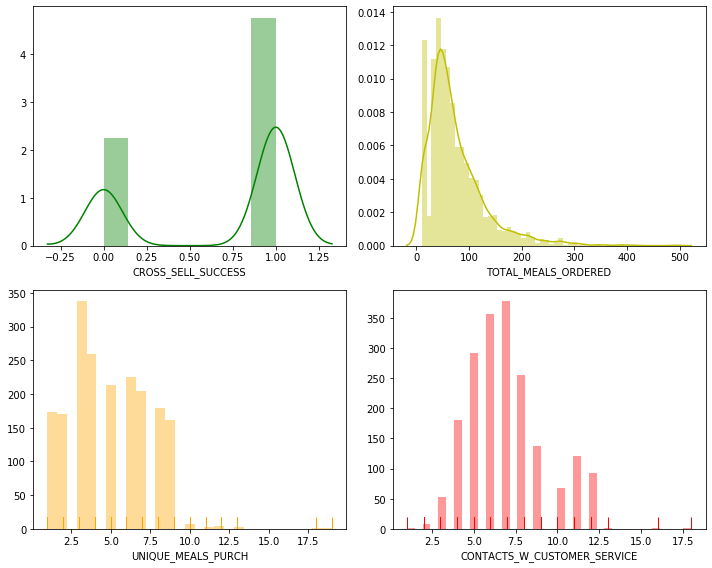

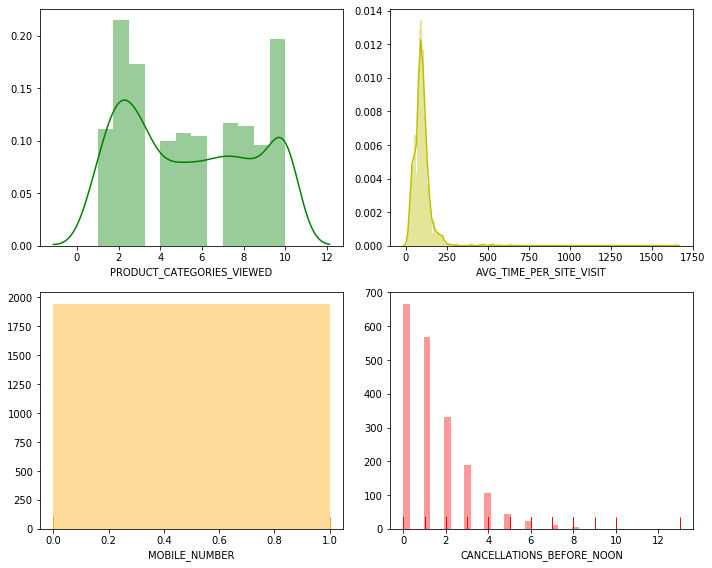

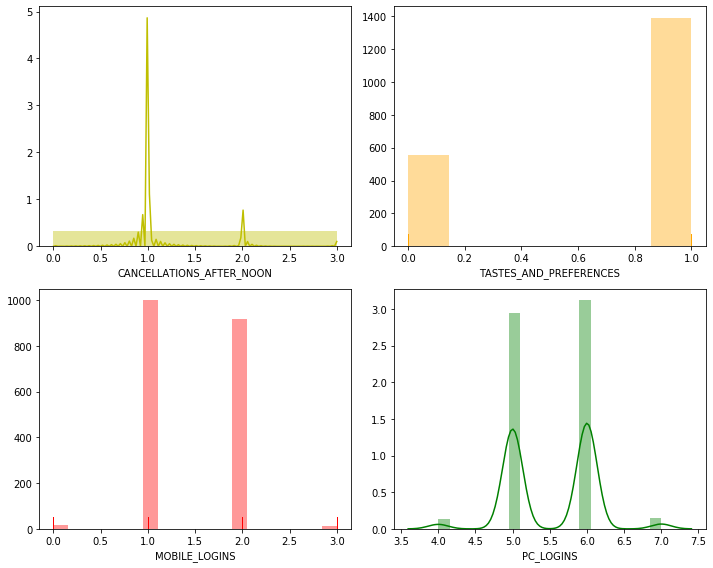

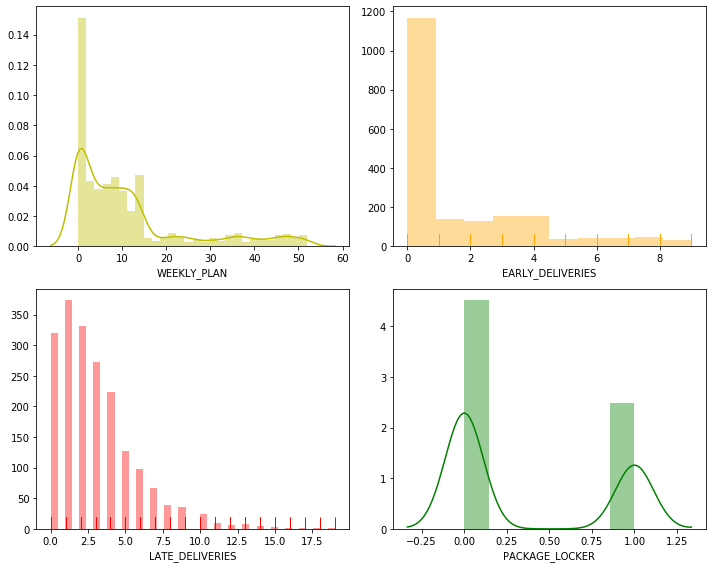

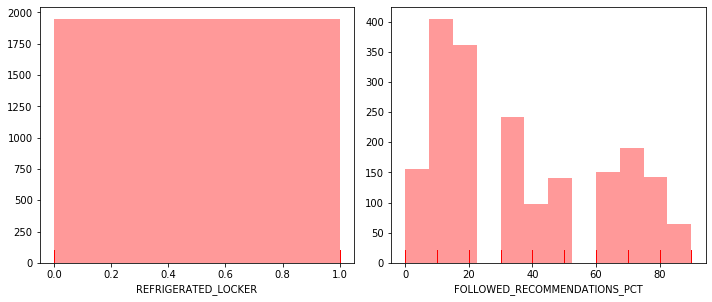

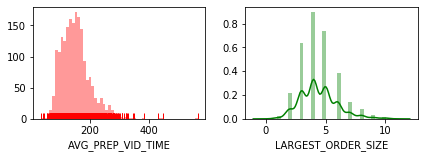

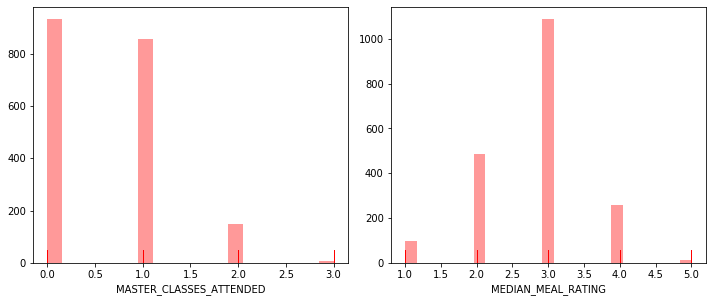

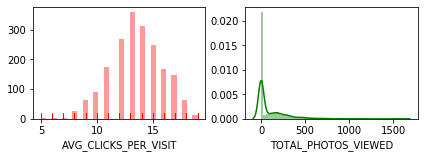

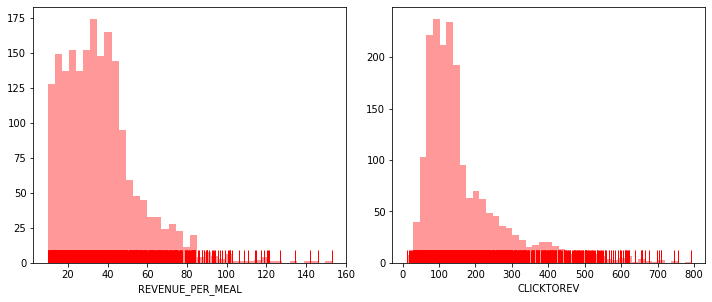

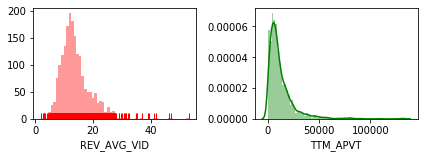

In [173]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))

########################

plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE_PER_MEAL'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE_PER_MEAL')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['CLICKTOREV'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CLICKTOREV')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['REV_AVG_VID'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('REV_AVG_VID')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['TTM_APVT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TTM_APVT')
plt.tight_layout()
plt.show()

########################
########################


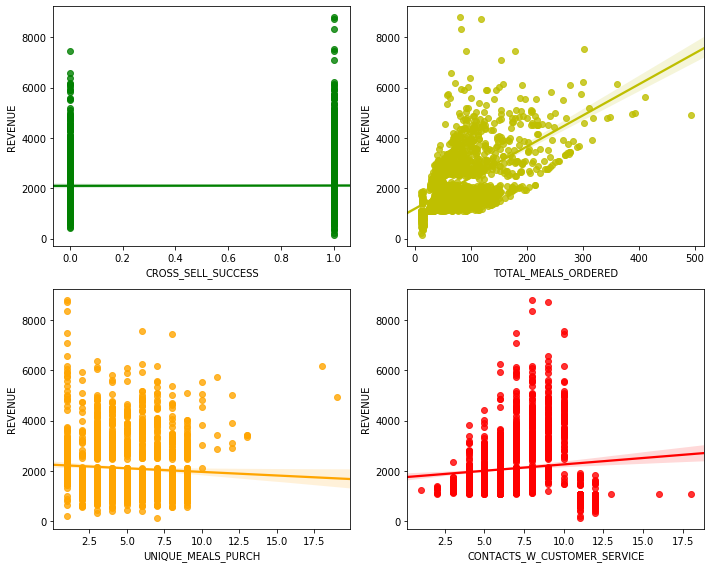

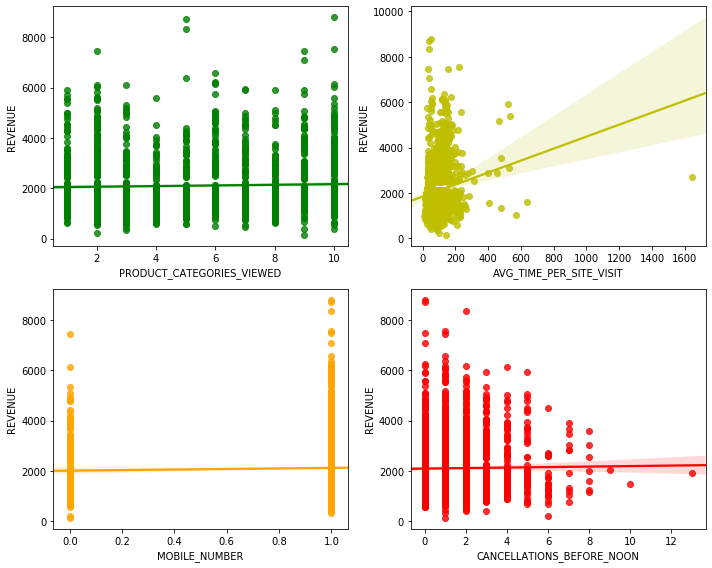

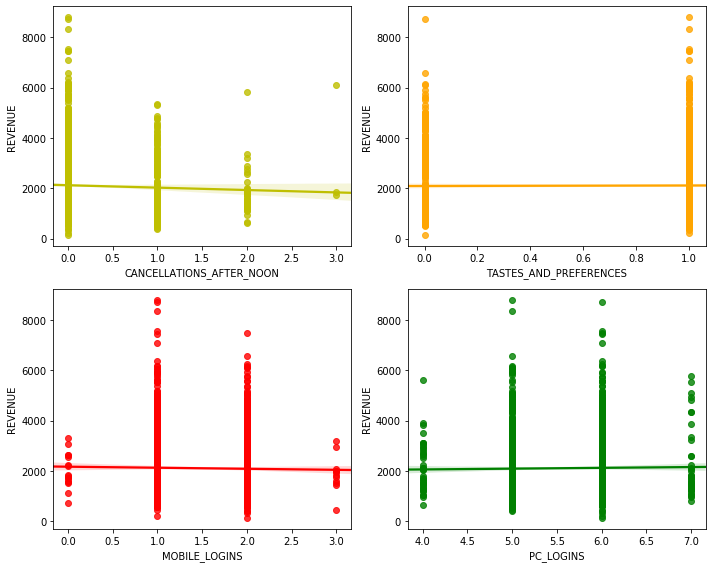

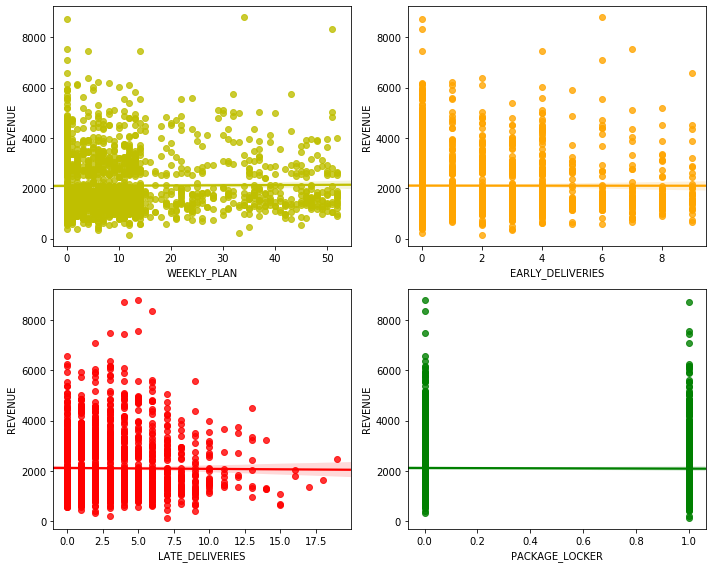

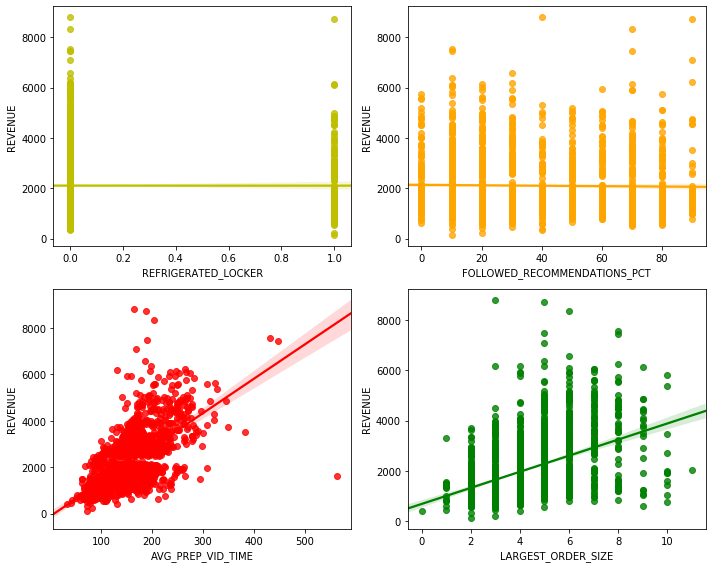

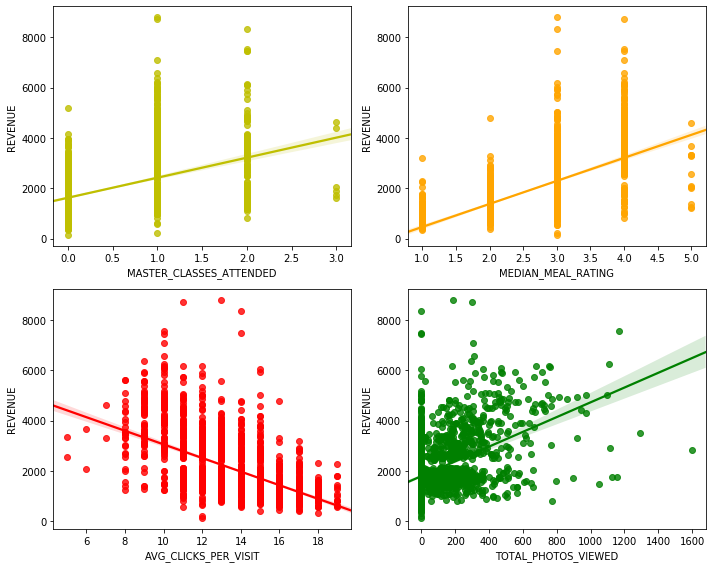

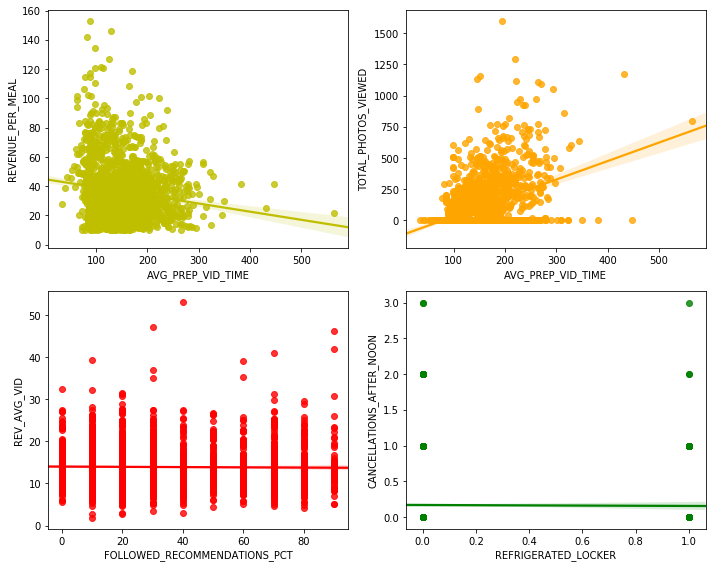

In [190]:
########################
# Visual EDA (regplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.regplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.regplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE_PER_MEAL'],
                color = 'y')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 2)
sns.regplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['TOTAL_PHOTOS_VIEWED'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.regplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REV_AVG_VID'],
                color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 4)
sns.regplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['CANCELLATIONS_AFTER_NOON'],
                color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')
plt.tight_layout()
plt.show()
